Train a custom CNN on a face mask dataset to classify whether a person is wearing a mask or not. This uses TensorFlow’s image_dataset_from_directory API for loading data.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, GlobalAveragePooling2D

In [2]:
dataset_dir='data'

#Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='int'
)

Found 7553 files belonging to 2 classes.
Found 7553 files belonging to 2 classes.
Found 7553 files belonging to 2 classes.


In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [4]:
model=Sequential([
    Rescaling(1./255,input_shape=(128,128,3)),
    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,activation='relu'),
    GlobalAveragePooling2D(),
    Dense(64,activation='relu'),
    Dense(1,activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
237/237 [==============================] - 178s 746ms/step - loss: 0.5560 - accuracy: 0.5068 - val_loss: 0.5289 - val_accuracy: 0.5068
Epoch 2/10
237/237 [==============================] - 191s 805ms/step - loss: 0.5013 - accuracy: 0.5068 - val_loss: 0.5121 - val_accuracy: 0.5068
Epoch 3/10
237/237 [==============================] - 182s 766ms/step - loss: 0.4855 - accuracy: 0.5068 - val_loss: 0.4303 - val_accuracy: 0.5068
Epoch 4/10
237/237 [==============================] - 161s 678ms/step - loss: 0.4282 - accuracy: 0.5068 - val_loss: 0.4836 - val_accuracy: 0.5068
Epoch 5/10
237/237 [==============================] - 160s 675ms/step - loss: 0.3716 - accuracy: 0.5068 - val_loss: 0.3087 - val_accuracy: 0.5068
Epoch 6/10
237/237 [==============================] - 192s 810ms/step - loss: 0.2907 - accuracy: 0.5068 - val_loss: 0.2782 - val_accuracy: 0.5068
Epoch 7/10
237/237 [==============================] - 209s 880ms/step - loss: 0.2610 - accuracy: 0.5068 - val_loss: 0.2269 -

In [7]:
loss, accuracy = model.evaluate(test_ds)
print(f"Loss: {loss:.2f}, Accuracy: {accuracy:.2f}")

237/237 [==============================] - 36s 151ms/step - loss: 0.2646 - accuracy: 0.5068
Loss: 0.26, Accuracy: 0.51


1/1 [==============================] - 0s 253ms/step


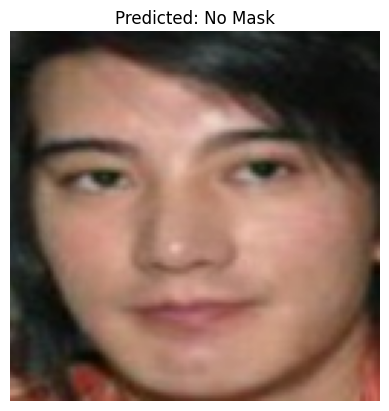

In [21]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {'Mask' if preds[0] < 0.5 else 'No Mask'}")
    plt.axis('off')
    plt.show()
    break
